# Loading packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [3]:
train_original=train.copy()
test_original=test.copy()

# Understanding the data

In [4]:
#Fetching the list of features (column names) in training dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Here we observe: -
12 independent features (variables)
1 target feature (variable) : - Loan_Status

In [5]:
#Fetching the list of features (column names) in test dataset
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
#Fetching data type of each feature in training dataset.
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In the above list of features three types of data types are observed: -
object
int64
float64

object: - Variables are categorical. 
Thus, categorical variables in our training data set are: - Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

int64: - Variables are of integer value.
Thus, ApplicantIncome is an integer value.

float64: - Variables have decimal values. 
Thus, decimal value variables in our training dataset are: - CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

In [7]:
#Fetching shape of training dataset: - Number of rows and columns
train.shape

(614, 13)

In [8]:
#Fetching shape of test dataset: - Number of rows and columns
test.shape

(367, 12)

# Univariate Analysis

In univariate analysis, we examine each variable individually. 
For categorical features, we use frequency table or bar plots which calculate number of each category in a given variable.
For numerical features, we use probability density plots which can be used to look at the distribution of the variable.

In [9]:
#Univariate analysis of target variable: Loan_Status
#Making frequency variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#We can normalize to represent proportions instead of number.
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

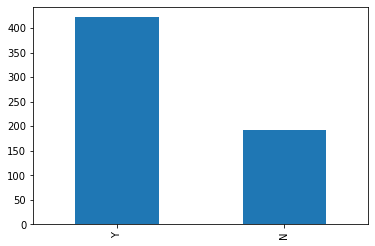

In [11]:
#Bar plot
train['Loan_Status'].value_counts().plot.bar()

We can say: -

Around 69% of applicants loan application was approved.
Around 31% of applicants loan application was disapproved.

In [12]:
#Univariate analysis of independent variable: Gender
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

<AxesSubplot:>

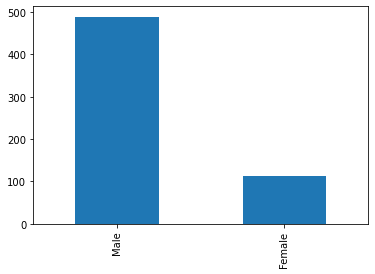

In [14]:
train['Gender'].value_counts().plot.bar()

82% of applicants are male.

18% of applicants are female

In [15]:
#Univariate analysis for independent variable: Married
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

66% of applicants are married.

34% of applicants are not married.

In [17]:
#Univariate analysis for independent variable: Dependents
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

Most number of applicants do not have any dependents. 

In [19]:
#Univariate analysis for independent varaible: Education
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
train['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

79% of applicants are Graduate.

21% of applicants are not Graduate.

In [19]:
#Univariate analysis for independent variable: Self_Employed
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

86% of applicants are self employed.

14% of applicants are not self employed.

In [21]:
#Univariate analysis for independent variable: - Property_Area
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
train['Property_Area'].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

38% of applicants live in Semi-urban area.

32% of applicants live in Urban areas.

30% of applicants live in Rural areas.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

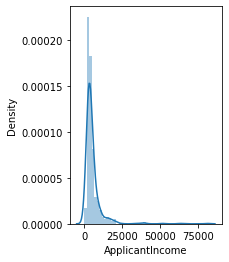

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

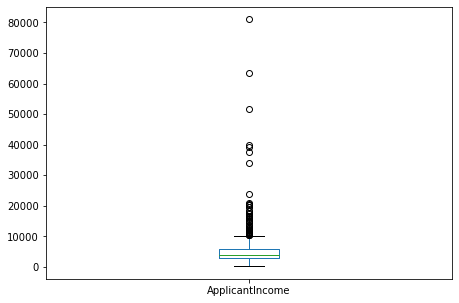

In [24]:
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

From 1st chart we see most of the data is distributed towards the left, thus, ApplicantIncome is not normally distributed.

From 2nd chart (box plot), we observe many outliers/extreme values. We can infer this is due to income disparity in the society. The income disparity may also be due to different Education status of the applicants.

Text(0.5, 0.98, '')

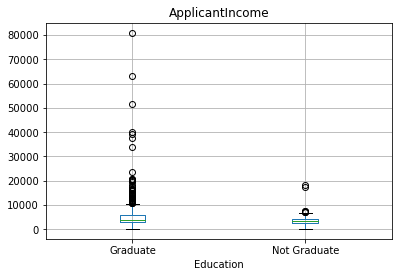

In [25]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

From the above box plot, we observe there are more number of applicants who are graduate and appear to have outier values in ApplicantIncome.

We also see applicants who are graduates have very high ApplicantIncome.

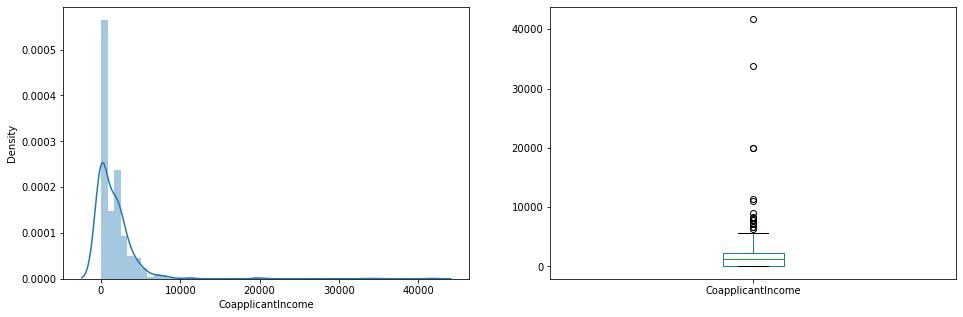

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

CoapplicantIncome is not normally distributed. 

We also see outliers at lower end of the CoapplicantIncome value.

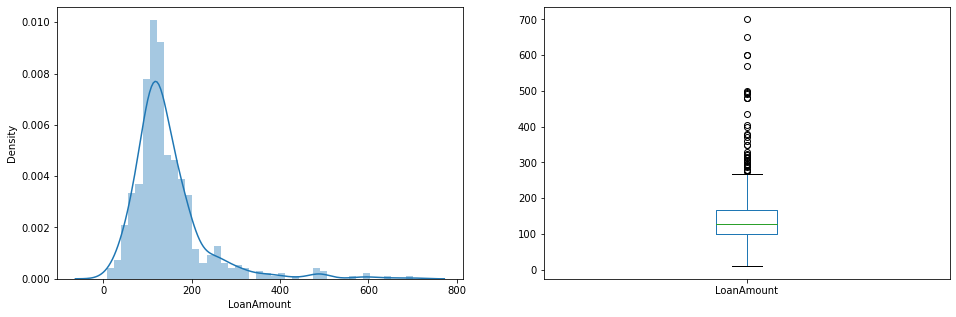

In [27]:
#Analyzing the variable: LoanAmount
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Here we see many outliers in LoanAmount.

But, the distribution of values is closer to normal distribution.



# Bivariate Analysis

Some of the hypothesis we documented during Hypothesis generation step: -

Applicants with high income should have more chance of loan approval.

Applicants who have repaid their previous loan should have higher chance of loan approval.

If the loan amount is less, higher is the chance of loan approval.

If the amount to be paid monthly is less, higher is the chance of loan approval.

We will use Bivariate analysis to test the above hypothesis. 

<AxesSubplot:xlabel='Gender'>

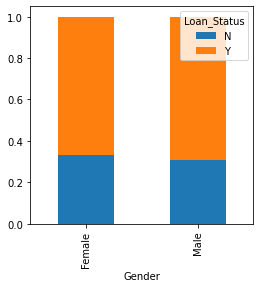

In [28]:
#Finding proportion of approved and unapproved loan by gender
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

# Categorical independent variable versus Target variable

Here we observe the proportion of approved and unapproved loans is approximately same for both genders: Female and Male

<AxesSubplot:xlabel='Married'>

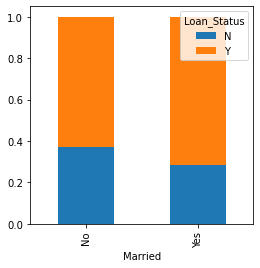

In [29]:
#Finding proportion of approved and unapproved loan by Marriage status
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

Applicants who are married have more approved loans as compared to applicants who are not married.

<AxesSubplot:xlabel='Self_Employed'>

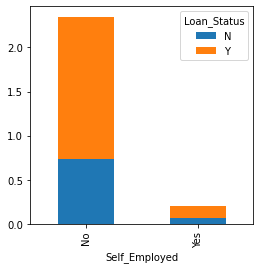

In [30]:
#Finding proportion of approved and unapproved loan by Education
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

Applicants who are not self employed have higher chance of loan approval.

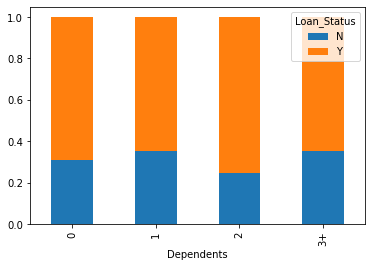

In [31]:
#Finding proportion of approved and unapproved loans by number of dependents for the applicant
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True) 
plt.show()

Here we observe the proportion of approved loans is similar for applicants with 1 and 3+ dependents. 
Applicants with no dependents have relatively more proportion of approved loans.
And applicants with 2 dependents have relatively most number of approved loans among other dependent categories. 

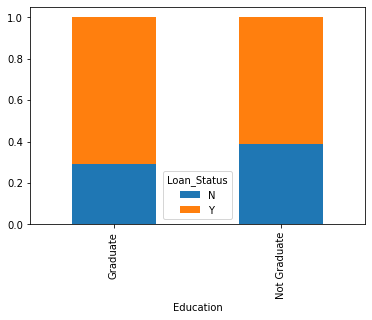

In [32]:
#Finding proportion of approved and unapproved loans by education status of the applicant
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

Applicants who are graduates have relatively more approved loan applicantions as compared to applicants who are non-graduates.

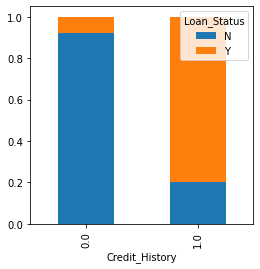

In [33]:
#Finding proportion of approved and unapproved loans by credit history of the applicant
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Applicants with Credit_History=1 have proportionately very high chance of getting loan approved compared to applicants having Credit_History=0

<AxesSubplot:xlabel='Property_Area'>

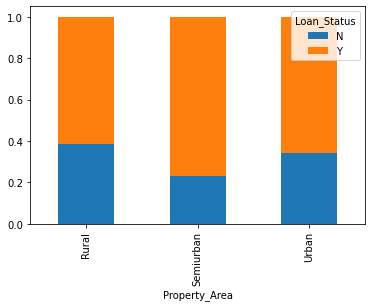

In [34]:
#Finding proportion of approved and unapproved loans by property area of the applicant
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

Applicants with property area Rural and Urban have approximately similar proportion of applicants getting loan applicaton approved.

Applicants with property area Semiurban have relatively more number of applicants with loan application approved.

# Numerical independent variable versus Target variable

<AxesSubplot:xlabel='Loan_Status'>

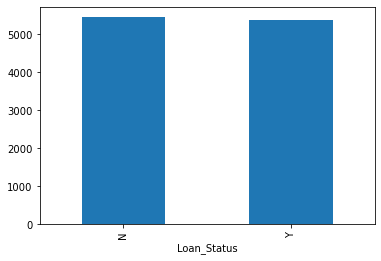

In [35]:
#We will calculate the mean income of applicants whose loan application is approved and not approved.
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [36]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

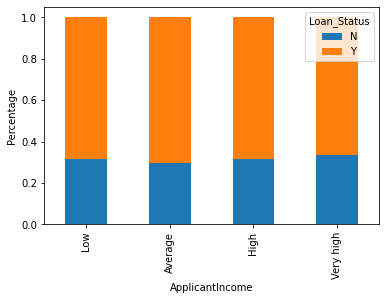

In [37]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

Here, we observed Applicant Income does not play a differentiator for evaluation of loan application approval.
Thus, our hypothesis "Applicants with high income should have more chance of loan approval." fails.

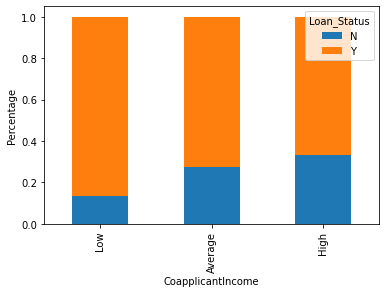

In [38]:
#We will analyze the coapplicant income versus Loan approval status
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

The above graph tells if coapplicant's income is less, the proportion of loan application getting approved increases. 
This, does not seem accurate.
We will combine Applicant income and Coapplicant income and visualize the combined effect of income on loan approval.

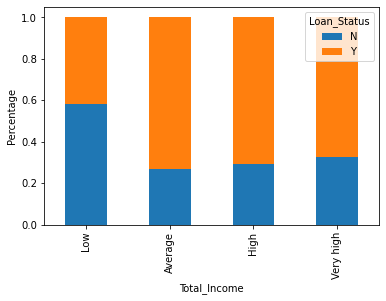

In [39]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

Low total income of applicant and coapplicant has relatively lesser loan approval status.

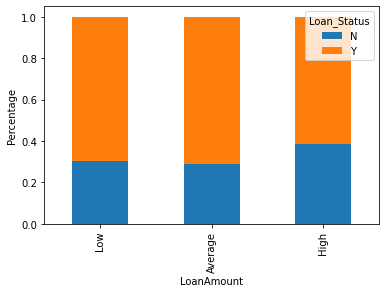

In [40]:
#Visualizing loan amount variable 
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

As compared to loan amount being higher, applicants having loan amount low or average have relatively higher chance of getting loan application approved.

Our hypothesis "If the loan amount is less, higher is the chance of loan approval", seems to be true.

In [41]:
#Converting the target variable's categories into 0 and 1, to find correlation with numerical variables. 
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [42]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,NaN,6000.0,High,Average


In [43]:
#Changing 3+ to 3 in dependent variable
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [44]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,NaN,6000.0,High,Average


In [45]:
#We will drop the bins created during exploration
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [46]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

# Visualizing correlation between all numerical variables

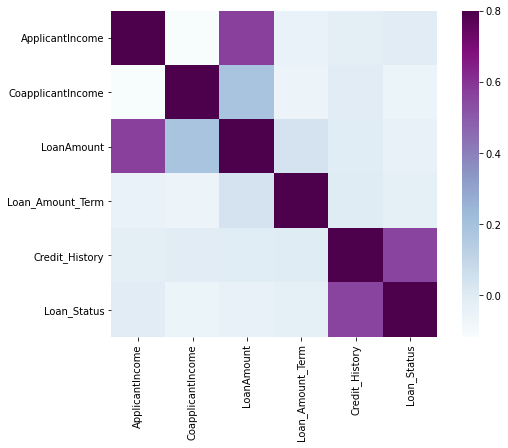

In [47]:
#We will use heat map to visualize the correlation. 
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We observe: -

ApplicantIncome is correlated with LoanAmount.

Credit_History is correlated with Loan_Status.

LoanAmount is correlated with CoapplicantIncome.

# Missing value imputation

In [48]:
#Fetching feature-wise count of all missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Following features have missing values: -

Gender

Married

Dependents

Self_Employed

LoanAmount

Loan_Amount_Term

Credit_History

For numerical features, imputation using mean or median.

For categorical features, imputation using mode.

In [49]:
#Imputing feature: Gender using mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [50]:
#Imputing feature: Married using mode
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [51]:
#Imputing feature: Dependents using mode
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [52]:
#Imputing feature: Self_Employed using mode
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [53]:
#Imputing feature: Credit_History using mode
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [54]:
#We find value count of the Loan amount term available feature.
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In the above result we observed, Loan_Amount_Term=360 has repeated most often.
Thus, we will replace the mode value with missing value in the feature: Loan_Amount_Term.

In [55]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [56]:
#Filling missing values in the feature: LoanAmount with the median value.
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [57]:
#Checking if we still have any missing values in any feature
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, we will apply the above on Test dataset.

In [58]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [59]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [60]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [61]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [62]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [63]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [64]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [65]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier treatment

We will apply log transformation to LoanAmount for removing outliers.

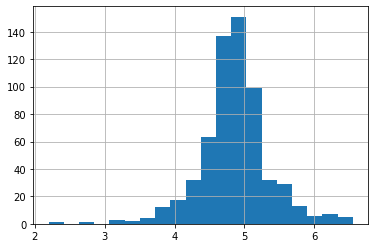

In [66]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

# Evaluation Metrics for Classification problems

In a classification problem, we can evaluate our models using any one of the following evaluation metrics: -

Accuracy: - (True positive + True negative)/(True positive + True negative + False positive + False negative)

Precision: - True positive/(True positive + False positive)

Recall: - True positive/(True positive + False negative)

Sepcificity: - True negative/(True negative + False positive)

# Model building: Part 1

We will start with Logistic Regression.

In [67]:
#We will drop the column Loan_ID from both training and test dataset.
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

We will use scikit-learn for making different models. Sklearn requires target variable in a separate dataset. Thus, we will drop our target variable from train dataset and save it in another dataset.

In [68]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

We will make dummy variables for the categorical variables. Dummy variables turn categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

For example: -
"Gender" variable has two classes: - Male and Female.

A Logistic Regression takes only the numeric values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert "Gender" variable into two variables: - 

Gender_Male for Male.

Gender_Female for Female.

Gender_Male will have value as 1 if Gender is Male.
Gender_Male will have value as 0 if Gender is Female.

In [69]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Now we will train the model on training dataset and make predictions for the test dataset.

To validate these predictions, we divide train dataset into two parts: -

train 

validation

We will train the model on train dataset and use that to make predictions on validation dataset.

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

In [71]:
#We will import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

In [72]:
#We will predict Loan_Status for validation set and calculate its accuracy.
pred_cv=model.predict(x_cv)

In [73]:
#Now we will calculate the accuracy to know how accurate our predictions were.
accuracy_score(y_cv,pred_cv)

0.8432432432432433

Our prediction is around 76% accuracy. 
Thus, 76% of loan status were accuractely predicted. 

In [74]:
# We make the prediction on test dataset.
pred_test=model.predict(test)

In [75]:
# Now we import the submission file which we have to submit on the solution checker.
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [76]:
# We only need Loan_ID and corresponding Loan_Status for the final submission. We will fill these columns with Loan_ID of the test dataset and predictions that we made: pred_test
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [77]:
#We convert 1 and 0 to Y and N.
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [78]:
#Finally, we will convert the submission to .csv format and submit the result.
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

After submission, the result was: -

Your score for this submission is : 0.7638888888888888.

# Stratified K Fold validation

In [79]:
from sklearn.model_selection import StratifiedKFold

In [82]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kflold{}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index], X.iloc[test_index]
    ytr,yvl=y.iloc[train_index], y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kflold5
accuracy_score 0.8048780487804879

2 of kflold5
accuracy_score 0.8373983739837398

3 of kflold5
accuracy_score 0.7804878048780488

4 of kflold5
accuracy_score 0.7886178861788617

5 of kflold5
accuracy_score 0.7950819672131147


# ROC curve

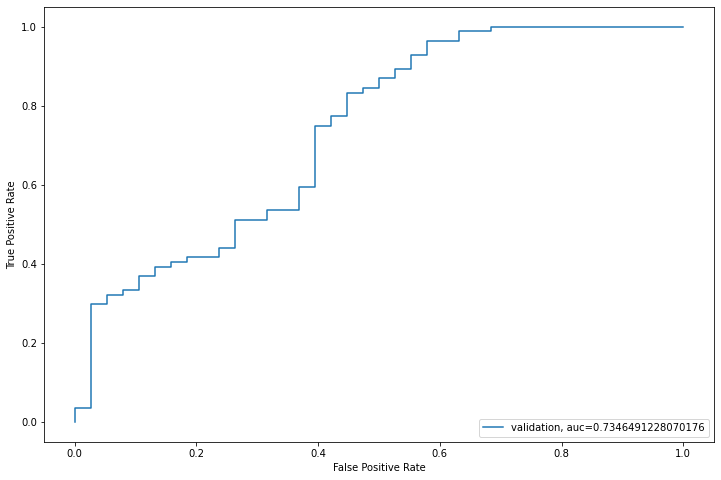

In [87]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We got AUC value= 0.73

In [88]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [89]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

On submission of the result, the accuracy was 0.738
Now, we will explore the ways to improve the accuracy.

# Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable.

We will create the following three new features: -

Total income: - If the total income (applicant income + coapplicant income) is high, chances of loan approval might also be high.

EMI: - Monthly amount to be repaid by the applicant. High EMI means more difficult to pay back the loan.

Balance income: - Income left after EMI is paid. If Balance income value is high, the chances of repaying the loan will also be high. 

In [90]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

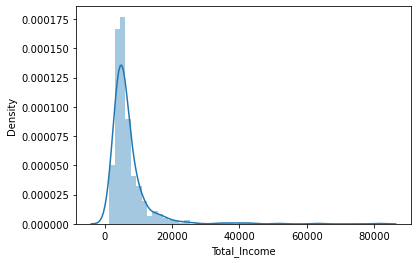

In [91]:
#Plotting the distribution of Total_Income
sns.distplot(train['Total_Income']);

We observe the distribution is right skewed. 
Thus, we will take log transformation to make the distribution normal.

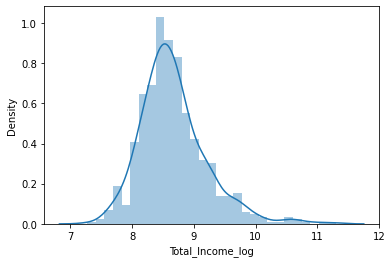

In [92]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log']=np.log(test['Total_Income'])

In [93]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

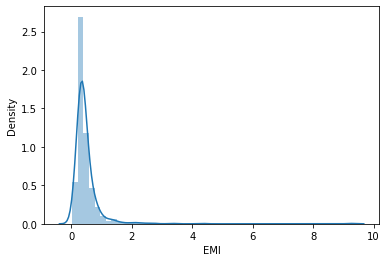

In [94]:
sns.distplot(train['EMI']);

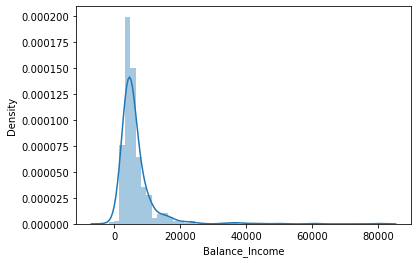

In [95]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income']);

We will now drop the variables which we used to create the new features. 
This is because correlation between the old features and new features will be very high and logistic regression assumes that the variables are not highly correlated. 

We also want to remove noise from the dataset. Thus, removing correlated features will help in reducing the noise too. 

In [96]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

# Model Building: Part 2

We will build the following models: -

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XGBoost

In [97]:
# Preparing the data for feeding into the models
X=train.drop('Loan_Status',1)
y=train.Loan_Status

# Logistic Regression

In [98]:
i=1
kf=StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


# Decision Tree

In [99]:
from sklearn import tree

In [100]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


We will try to improve the accuracy by tuning the hyperparamteres for this model. 

We will use grid search to get the optimized values of hyper parameters.

Grid-search is a way to select the best family of hyper parameters, parameterized by a grid of parameters.

We will tune the max_depth and n_estimators parameters.
max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that used in random forest model.

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
# Provide a range of max_depth from 1 to 20 with an interval of 2 from 1 to 200 with an interval of 20 for n_estimators.
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators':list(range(1,200,20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [108]:
#Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [110]:
GridSearchCV(cv=None, error_score='raise',estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=10,n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False), param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19], 'n_estimators':[1,21,41,61,81,101,121,141,161,181]}, pre_dispatch='2*n_jobs',refit=True, return_train_score='warn',scoring=None, verbose=0 )

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1,
                                              random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [111]:
# Estimating the optimized value

grid_search.best_estimator_RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=3,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_RandomForestClassifier'

# XGBoost

In [114]:
from xgboost import XGBClassifier

In [115]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=XGBClassifier(n_estimators=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7804878048780488

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7642276422764228

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7622950819672131
